In [74]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [75]:
df=pd.read_excel('L:\TRADING\EURUSD_data.xlsx',skiprows=1)
df

,направление,date_e,time_e,open_e,max_e,min_e,close_e,v_e,date_o,time_o,...,profit achieved the opposite channel border,date_maxmov,time_maxmov,open_maxmov,max_maxmov,min_maxmov,close_maxmov,v_maxmov,other,Unnamed: 68
0,лонг,2022-11-14,09:15:00,1.03180,1.03184,1.03157,1.03162,135,2022-11-14,09:14:00,...,да,2022-11-14 00:00:00,09:14:00,1.03164,1.03179,1.03164,1.03179,74.0,NaN,NaN
1,шорт,2022-11-14,09:24:00,1.03234,1.03260,1.03218,1.03233,229,2022-11-14,09:23:00,...,с отсрочкой,2022-11-14 00:00:00,09:23:00,1.03256,1.03285,1.03233,1.03233,168.0,NaN,NaN
2,лонг,2022-11-14,09:50:00,1.03172,1.03173,1.03132,1.03143,164,2022-11-14,09:49:00,...,да,2022-11-14 00:00:00,09:49:00,1.03163,1.03175,1.03157,1.03173,176.0,тренд несплошной,NaN
3,шорт,2022-11-14,10:09:00,1.03294,1.03340,1.03289,1.03309,258,2022-11-14,10:07:00,...,*,2022-11-14 00:00:00,10:08:00,1.03295,1.03307,1.03249,1.03294,248.0,от уровня проторговки получился второй вход,NaN
4,шорт,2022-11-14,10:23:00,1.03450,1.03462,1.03422,1.03441,214,2022-11-14,10:21:00,...,да,2022-11-14 00:00:00,10:22:00,1.03452,1.03452,1.03431,1.03449,202.0,*,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,лонг,2022-11-17,11:58:00,1.03616,1.03634,1.03608,1.03622,175,2022-11-17,11:57:00,...,нет,2022-11-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,*,NaN
94,лонг,2022-11-17,12:15:00,1.03593,1.03612,1.03585,1.03597,173,2022-11-17,12:14:00,...,да,2022-11-17 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,*,NaN
95,шорт,2022-11-17,12:34:00,1.03654,1.03693,1.03654,1.03662,157,2022-11-17,12:32:00,...,да,2022-11-17 00:00:00,12:33:00,1.03666,1.03676,1.03646,1.03655,181.0,*,NaN
96,лонг,2022-11-17,12:42:00,1.03622,1.03628,1.03599,1.03624,146,2022-11-17,12:38:00,...,стоп,2022-11-17 00:00:00,12:39:00,1.03625,1.03644,1.03618,1.03618,179.0,*,NaN


In [93]:
df_sh=df.loc[(df.направление=='шорт')&(df.date_p2!='стоп')] # без стопов
df_sh.columns

Index(['направление', 'date_e', 'time_e', 'open_e', 'max_e', 'min_e',
       'close_e', 'v_e', 'date_o', 'time_o', 'open_o', 'max_o', 'min_o',
       'close_o', 'v_o', 'date_lt', 'time_lt', 'open_lt', 'max_lt', 'min_lt',
       'close_lt', 'v_lt', 'date_sc', 'time_sc', 'open_sc', 'max_sc', 'min_sc',
       'close_sc', 'v_sc', 'stop under fractal', 'date_ts', 'time_ts',
       'open_ts', 'max_ts', 'min_ts', 'close_ts', 'v_ts', 'candles in trend',
       'Num of etrances', 'date_p', 'time_p', 'open_p', 'max_p', 'min_p',
       'close_p', 'v_p', 'date_p2', 'time_p2', 'open_p2', 'max_p2', 'min_p2',
       'close_p2', 'v_p2', 'SMA level', 'SMA direction',
       'intersection of 14period canal border',
       'no of cande ounside channel border',
       'закрытие следующей свечи после пересечения внутри канала',
       'left level', 'profit achieved the opposite channel border',
       'date_maxmov', 'time_maxmov', 'open_maxmov', 'max_maxmov', 'min_maxmov',
       'close_maxmov', 'v_maxmov'

Стратегия предусматривает вход после поглощения последней свечи в движении. Под движением понимается несколько следующих друг за другом свечей одного направления без проторговок.
индексами обозначены следующие свечи:
+ _е - свеча входа  _о - свеча, перебившая движение, т.е. в случае шорта закрывшаяся ниже минимума последней свечи движения вверх
+ _lt - последняя свеча в перебитом движении
+ _sc - свеча стопа
+ _ts - свеча начала перебитого движения
+ _p - свеча выхода из сделки (первый профит)
+ _p2 - свеча выхода из сделки (второй профит) либо указан "стоп", если сработал стоп
+ _maxmov - максимальное движение в сторону сделки до входа  
Остальные столбцы, а также _maxmov в анализе не использовались

In [77]:
# #расположение точки входа в % от объема последней свечи движения
# e_lt=round((df_sh.max_e-df_sh.min_lt)*100/(df_sh.max_lt-df_sh.min_lt))
# # e_lt

In [78]:
# plt.hist(e_lt, bins=25)

In [79]:
#расположение точки входа в % от объема свечи, перебившей движение
e_o=round((df_sh.max_e-df_sh.min_o)*100/(df_sh.max_o-df_sh.min_o))
np.percentile (e_o, 32)

50.2

**Вывод:** 70% сделок состоится при выставлении заявки на 50% диапазона свечи, перебившей движение


(array([2., 3., 8., 4., 5., 4., 2., 1., 7., 2., 0., 0., 0., 2., 1.]),
 array([  3.        ,  18.46666667,  33.93333333,  49.4       ,
         64.86666667,  80.33333333,  95.8       , 111.26666667,
        126.73333333, 142.2       , 157.66666667, 173.13333333,
        188.6       , 204.06666667, 219.53333333, 235.        ]),
 <BarContainer object of 15 artists>)

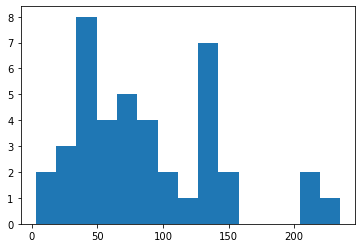

In [96]:
plt.hist(e_o, bins=15)

{'whiskers': [<matplotlib.lines.Line2D at 0x22670803910>,
 'caps': [<matplotlib.lines.Line2D at 0x22670803e50>,
 'boxes': [<matplotlib.lines.Line2D at 0x226707f7490>],
 'medians': [<matplotlib.lines.Line2D at 0x22670811430>],
 'fliers': [<matplotlib.lines.Line2D at 0x22670811700>],
 'means': []}

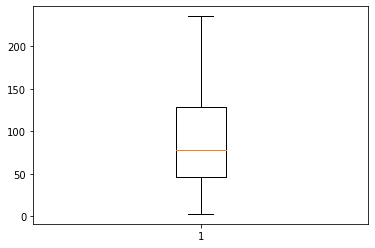

In [81]:
plt.boxplot(e_o)

In [82]:
#расположение точки входа в % расстояния от стопа
e_stop=round((df_sh.max_e-df_sh.min_o)*100/(df_sh.max_sc-df_sh.min_o))
np.percentile(e_stop,25)

31.0

**Вывод:** 75% сделок состоится при выставлении заявки на 30% диапазона между стопом и экстремумом перебившей свечи

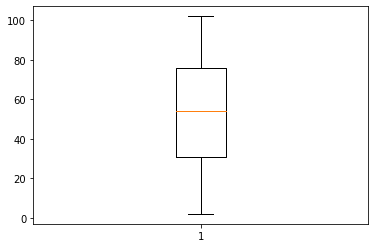

In [83]:
plt.boxplot(e_stop)
df_sh['e_stop']=e_stop

In [101]:
#профит в процентах от перебитого движения
#движение в сторону сделки рассчитывали не от точки входа, а от экстремума квартала (для шорта - максимум свечи стопа) смены движения
#как разницу между максимумом свечи стопа и минимумом свечи профита (первого или второго, если второй был)
#диапазон перебитого движения - разница между максимумом свечи стопа и минимумом свечи начала тренда
df_sh.min_p2=df_sh['min_p2'].fillna(0)
# df_sh.min_p2
condition=[(df_sh['min_p2']==0), (df_sh['min_p2']>0)]
calculation=[((df_sh.max_sc-df_sh.min_p)/(df_sh.max_sc-df_sh.min_ts)),((df_sh.max_sc-df_sh.min_p2)/(df_sh.max_sc-df_sh.min_ts))]
df_sh['tp_sh']=np.select(condition, calculation)
df_sh[['tp_sh','min_p2']]#столбец tp_sh содержит сведения о профите в процентах к перебитому движению



,tp_sh,min_p2
1,0.826531,0.00000
4,0.964706,0.00000
6,1.453744,0.00000
9,1.554545,0.00000
11,1.347826,1.02724
15,0.644295,0.00000
16,1.740964,1.02972
17,0.791469,0.00000
18,0.851852,0.00000
21,1.153285,0.00000


{'whiskers': [<matplotlib.lines.Line2D at 0x226708be910>,
 'caps': [<matplotlib.lines.Line2D at 0x226708beeb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x226708be640>],
 'medians': [<matplotlib.lines.Line2D at 0x226708cb490>],
 'fliers': [<matplotlib.lines.Line2D at 0x226708cb760>],
 'means': []}

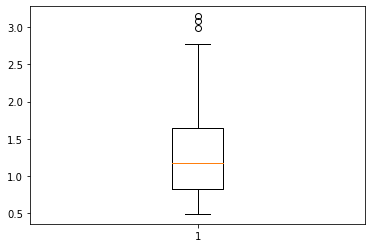

In [85]:
plt.boxplot(df_sh.tp_sh)

(array([3., 6., 4., 3., 4., 2., 2., 2., 6., 1., 1., 0., 0., 0., 2., 1., 0.,
        1., 1., 2.]),
 array([0.49382716, 0.62639387, 0.75896057, 0.89152728, 1.02409399,
        1.15666069, 1.2892274 , 1.42179411, 1.55436081, 1.68692752,
        1.81949423, 1.95206093, 2.08462764, 2.21719434, 2.34976105,
        2.48232776, 2.61489446, 2.74746117, 2.88002788, 3.01259458,
        3.14516129]),
 <BarContainer object of 20 artists>)

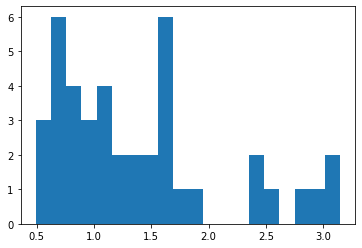

In [102]:
plt.hist(df_sh.tp_sh, bins=20)

In [103]:
def profit(val):
    profit=0
    for key,value in df_sh['tp_sh'].iteritems():
        if value < val:
            profit-=(df_sh.max_sc-df_sh.max_e)*10000
        else:
            profit+=(df_sh.max_e-df_sh.max_sc+(df_sh.max_sc-df_sh.min_ts)*val)*1000
    return profit

a=[0.236, 0.382, 0.5, 0.618, 1, 1.618, 2.618, 3]#возможный профит в зависимости от выхода по фибо диапазона перебитого движения
for i in a:
        print(i, profit(i).sum())
        
            
# for key,value in df_sh['tp_sh'].iteritems():
#    print (key,value)
        

0.236 178.45168000001212
0.382 673.37416000001
0.5 895.6000000000117
0.618 910.7771200000176
1 -518.4799999999419
1.618 -3243.221359999888
2.618 -4804.015039999862
3 -5446.639999999853


**Вывод:** оптимальный выход на 0,618% от диапазона  перебитого движения

Задачи для дальнейшего анализа: выход из сделки частями (по половинам, третями, треть и две трети)

## Корреляция между данными
### 1. Анализ корреляции между профитом и:
- объемом перебившей свечи 
- диапазоном перебившей свечи
- диапазоном тела перебившей свечи

In [104]:
df_sh_corr=df_sh[['tp_sh','open_o', 'max_o', 'min_o','close_o', 'v_o']]
df_sh_corr['max-min_o']=10000*(df_sh_corr.max_o-df_sh_corr.min_o)#диапазон перебивающей свечи
df_sh_corr['open_o-close_o']=10000*(df_sh_corr.open_o-df_sh_corr.close_o)#расстояние между отркрытием и закрытием перебивающей свечи
df_sh_corr['move']=10000*(df_sh['max_sc']-df_sh['min_lt'])
corr = df_sh_corr.corr()
corr.style.background_gradient(cmap='coolwarm')


,tp_sh,open_o,max_o,min_o,close_o,v_o,max-min_o,open_o-close_o,move
tp_sh,1.000000,0.293349,0.294117,0.301936,0.302815,0.057712,-0.097635,-0.153072,-0.189494
open_o,0.293349,1.000000,0.999770,0.997988,0.998313,0.321432,0.093258,0.061910,0.362718
max_o,0.294117,0.999770,1.000000,0.997794,0.997930,0.326653,0.099611,0.064548,0.368329
min_o,0.301936,0.997988,0.997794,1.000000,0.999717,0.277180,0.033343,0.003106,0.330504
close_o,0.302815,0.998313,0.997930,0.999717,1.000000,0.287404,0.039613,0.003861,0.333893
v_o,0.057712,0.321432,0.326653,0.277180,0.287404,1.000000,0.763339,0.595571,0.713694
max-min_o,-0.097635,0.093258,0.099611,0.033343,0.039613,0.763339,1.000000,0.925309,0.582214
open_o-close_o,-0.153072,0.061910,0.064548,0.003106,0.003861,0.595571,0.925309,1.000000,0.496595
move,-0.189494,0.362718,0.368329,0.330504,0.333893,0.713694,0.582214,0.496595,1.000000


Отсутствует корреляция между профитом и:
- объемом перебивающей свечи
- диапазоном перебивающей свечи
- диапазоном тела перебивающей свечи
- диапазоном предшествовавшего перебитого движения

**Обратить внимание** на корреляцию между объемом перебивающей свечи и диапазоном перебитого движения (для выбора оптимальной точки входа)

### 2. Анализ корреляции между положением точки входа и:
    - диапазоном перебитого движения
    - объемом перебившей свечи

In [89]:
df_sh_corr[['e_o','e_stop']]=pd.DataFrame({'e_o':e_o,'e_stop': e_stop})
corr = df_sh_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,tp_sh,open_o,max_o,min_o,close_o,v_o,max-min_o,open_o-close_o,move,e_o,e_stop
tp_sh,1.000000,0.293349,0.294117,0.301936,0.302815,0.057712,-0.097635,-0.153072,-0.189494,0.128248,0.256679
open_o,0.293349,1.000000,0.999770,0.997988,0.998313,0.321432,0.093258,0.061910,0.362718,0.105249,-0.014929
max_o,0.294117,0.999770,1.000000,0.997794,0.997930,0.326653,0.099611,0.064548,0.368329,0.098479,-0.016977
min_o,0.301936,0.997988,0.997794,1.000000,0.999717,0.277180,0.033343,0.003106,0.330504,0.118175,-0.012011
close_o,0.302815,0.998313,0.997930,0.999717,1.000000,0.287404,0.039613,0.003861,0.333893,0.120232,-0.009838
v_o,0.057712,0.321432,0.326653,0.277180,0.287404,1.000000,0.763339,0.595571,0.713694,-0.109823,-0.118447
max-min_o,-0.097635,0.093258,0.099611,0.033343,0.039613,0.763339,1.000000,0.925309,0.582214,-0.288684,-0.075567
open_o-close_o,-0.153072,0.061910,0.064548,0.003106,0.003861,0.595571,0.925309,1.000000,0.496595,-0.254112,-0.088023
move,-0.189494,0.362718,0.368329,0.330504,0.333893,0.713694,0.582214,0.496595,1.000000,-0.006628,-0.195864
e_o,0.128248,0.105249,0.098479,0.118175,0.120232,-0.109823,-0.288684,-0.254112,-0.006628,1.000000,0.736903


Отсутствует корреляция между положением точки входа и:
- диапазоном перебитого движения
- объемом перебившей свечи

Имеется корреляция между положением точки входа относительно стопа и относительно объема свечи, перебившей движение. 

**Задача:** просчитать наиболее выгодный выбор точки входа с учетом пропущенных сделок, стопа, точки выхода и алгоритма выхода

## Выбор точки входа

Здесь выбрана оптимальная точка входа для шортовых сделок относительно перебившей свечи с одномоментным выходом всем лотом.

In [105]:
# ent = (df_sh.max_o-df_sh.min_o)*0.4+df_sh.min_o
# #df_temp=df_sh.max_e
# df_temp=pd.DataFrame({'ent':ent, 'max_e':df_sh.max_e, 'comp': df_sh.max_e>ent})
# df_temp.loc[df_temp.max_e>ent].shape


In [111]:
df_sh_all=df.loc[(df.направление=='шорт')]#Таблица всех шортовых сделок (прибыльных и убыточных)
drop = ['open_e','close_e','date_o', 'open_o', 'close_o','v_o','date_lt','open_lt', 'close_lt', 'v_lt', \
        'date_sc','v_sc','stop under fractal', 'date_ts', 'open_ts', 'close_ts', 'v_ts', 'candles in trend', \
        'Num of etrances', 'date_p', 'open_p', 'close_p', 'v_p', 'open_p2', 'close_p2', 'v_p2', \
        'закрытие следующей свечи после пересечения внутри канала','left level', 'profit achieved the opposite channel border',
       'date_maxmov', 'time_maxmov', 'open_maxmov', 'close_maxmov', 'v_maxmov', 'other', 'Unnamed: 68' ]
df_sh_all=df_sh_all.drop(columns=drop)
df_sh_all['tp_sh']= df_sh['tp_sh']#Добавлен столбец, где указано соотношение профита и перебитого движения. Для расчета оптимальной точки выхода
df_sh_all.loc[(df_sh_all.date_p2=='стоп'),'tp_sh']=0
# (df_sh_all.loc[(df_sh_all.date_p2=='стоп'), 'tp_sh']-df_sh_all['max_e']).sum()
df_sh_all.shape[0]

50

In [110]:
def entr_select (level, val):
    ent = (df_sh_all.max_o-df_sh_all.min_o)*level+df_sh_all.min_o #расчет точки входа относительно диапазона перебившей свечи, level - доля диапазона, начиная от минимума этой свечи
    df_temp=df_sh_all
    df_temp['ent']=ent
    df_temp=df_temp.loc[df_temp.max_e>ent]# выбираем случаи, когда сделка состоялась, т.е. точка входа ниже максимума свечи входа
    df_profit=df_temp.loc[(df_temp['tp_sh']>val)&(df_temp.date_p2!='стоп'),['ent','max_sc','min_ts']]
    profit = 10000*(df_profit.ent-df_profit.max_sc+(df_profit.max_sc-df_profit.min_ts)*val).sum()
    df_stop=df_temp.loc[((df_temp['tp_sh']<val)&(df_temp.date_p2!='стоп'))|((df_temp['tp_sh']>val)&(df_temp.date_p2=='стоп')),['ent','max_sc']]                                      
    #стоп - потенциально профитные сделки, но не дошедшие до точки выхода + сработавшие стопы с учетом точки входа
    stop=10000*(df_stop.max_sc-df_stop.ent).sum()
        
    return df_profit.shape[0], df_stop.shape[0], profit-stop

res=[]

for i in np.arange(0,1.1,0.1):#точка входа в долях от диапазона перебившей свечи
    for val in a: #выходы по уровням Фибоначчи
        p,s,g=entr_select(i,val) #p - количество профитных сделок, s - число убыточных сделок, g- прибыль с учетом убыточных сделок
        res.append([i,val,p,s,g]) 
#         print(f'Вход {i}, выход {val}, профит {entr_select(i,val):.0f}')
res=pd.DataFrame(np.array(res), columns = ['enter','exit','N+','N-','profit'])
res.sort_values(by='profit', ascending=False)[:5]





,enter,exit,N+,N-,profit
44,0.5,1.0,20.0,8.0,260.80
36,0.4,1.0,21.0,11.0,239.02
60,0.7,1.0,19.0,4.0,234.70
28,0.3,1.0,23.0,14.0,227.55
52,0.6,1.0,19.0,5.0,212.92


ВЫВОДЫ: 
1. Наибольшя прибыль получается при входе 0,5 относительно диапазона свечи, перебившей движение, с выходом всем лотом на 100% диапазона перебитого движения. Из 50 потенциальных сделок совершено 28, из них 8 убыточных.
2. При входе на 0,7 диапазона свечи, перебившей движение, с выходом всем лотом на 100% диапазона перебитого движения прибыль меньше на 10%, но при этом из 23 сделок убыточных только 4, что гораздо легче перенести психологически :)

Задачи для дальнейшего анализа:
- выполнить анализ для сделок в лонг
- сравнить результативность лонговых и шортовых сделок (по количеству, точкам входа, выхода, профиту)
- провести общий анализ для сделок в обоих направлениях
- проалазирировать эффективность выхода частями
- в итоговый анализ добавить комиссии биржи, спреды.
